## 1. Load data and import libraries

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
# import seaborn as sns 
from sklearn.model_selection import train_test_split


In [18]:
df = pd.read_csv(r"https://raw.githubusercontent.com/SagarChhabriya/data-science/refs/heads/main/datasets/01-Simple-Linear-Reg/cgpa.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


## 2. Data Exploration (+EDA) and Preprocessing

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [20]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


<Axes: title={'center': 'Package Distributioun'}, ylabel='Density'>

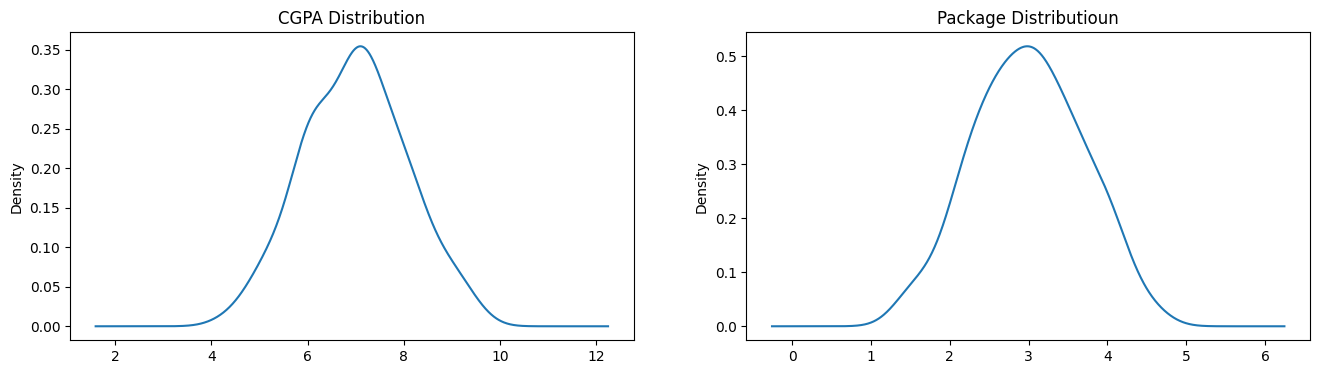

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

df['cgpa'].plot(kind="kde", ax=ax1, title="CGPA Distribution") # kde: kernel density estimation
df['package'].plot(kind="kde", ax=ax2, title="Package Distributioun")

## 3. Data Split

In [22]:
# train - test split

X = df['cgpa']
y = df['package']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160,), (160,), (40,), (40,))

In [33]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [34]:
X_train.shape, X_test.shape

((160, 1), (40, 1))

## 4. Model Training

In [35]:
# 4.1 import libraries 
from sklearn.linear_model import LinearRegression

# 4.2 Create an object
lr = LinearRegression()

# 4.3 fit data
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 5. Make Predcitions and Evaluate the Model

In [39]:
from sklearn.metrics import r2_score # regression eval metrics: 0-100%

y_prediction = lr.predict(X_test)

In [40]:
y_prediction

array([2.34108818, 3.6324441 , 2.40231627, 3.18158277, 3.23724466,
       2.39675008, 2.39118389, 2.51364005, 3.24837704, 3.47102461,
       4.08887162, 2.07947729, 2.97563376, 2.26872772, 2.93667044,
       2.97563376, 1.97371969, 3.62131172, 2.79751571, 2.44684578,
       3.52112031, 3.65470886, 2.97006757, 1.9681535 , 3.04242803,
       3.12592087, 2.79751571, 3.68810599, 2.51364005, 3.32630369,
       2.36891913, 2.97563376, 3.71037075, 3.08139136, 2.25759535,
       2.50807386, 3.96641546, 3.91631975, 3.17045039, 2.80864808])

In [ ]:
r2_score(y_test, y_pred=y_prediction)
# actual: y_test, predicted y: y_predctions

0.8236125488822525

In [ ]:
m = lr.coef_
c = lr.intercept_
# y = m x + c

x = 6.89
y = m * x + c
y

# 3.26 - 2.95 = 0.31 -> error
# hyperparameter tuning

array([2.95336901])

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

print(mean_squared_error(y_test, y_prediction)) # (y - y_hat)^2
print(root_mean_squared_error(y_test, y_prediction)) # root
print(mean_absolute_error(y_test, y_prediction)) # |y - y_hat|

0.08487830293080174
0.2913388112332474
0.23796286877094106


In [ ]:
mean_squared_error(X_train, y_train) # train error 16.27; test = 0.08; train: 90%, test: 70%; high chances of overfitting

# train error vs test error; high gap: overfitting ✅
# underfitting: low r2 score on both train and test: train r2: 50, test: 45; Near to 100; 

# best fit/appropriate: train 90; test 86-88; 


16.27034125